- random filtering 1000.
- For each annotator, create csv file with his allocated number. Only rowid, Text and label is needed.

- Sashank: 125 + 31
- Omar: 125 + 31
- Duayna:250 + 63
- Yiheng: 250 + 63
- Megg: 250 + 63



In [ ]:
import pandas as pd
import numpy as np
import json
import random
from collections import Counter
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, leaves_list

In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 70.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:

# Load spaCy model
nlp = spacy.load('en_core_web_md')


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/capFantasticFour/"


In [ ]:
#categories
categories = json.load(open(path + "Datasets/comments/US_category_id.json"))

In [ ]:
cat_id = [cat["id"] for cat in categories["items"]]
#chan_id = [cat['snippet']["channelId"] for cat in categories["items"]]
cat = [cat['snippet']["title"] for cat in categories["items"]]

cat_df = pd.DataFrame({'category_id': cat_id, 'category': cat})

In [ ]:
cat_df.head()

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [ ]:
cat

['Film & Animation',
 'Autos & Vehicles',
 'Music',
 'Pets & Animals',
 'Sports',
 'Short Movies',
 'Travel & Events',
 'Gaming',
 'Videoblogging',
 'People & Blogs',
 'Comedy',
 'Entertainment',
 'News & Politics',
 'Howto & Style',
 'Education',
 'Science & Technology',
 'Nonprofits & Activism',
 'Movies',
 'Anime/Animation',
 'Action/Adventure',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Family',
 'Foreign',
 'Horror',
 'Sci-Fi/Fantasy',
 'Thriller',
 'Shorts',
 'Shows',
 'Trailers']

In [ ]:
# Compute similarity matrix
docs = [nlp(text) for text in cat]
similarity_matrix = np.array([[doc1.similarity(doc2) for doc2 in docs] for doc1 in docs])
print(similarity_matrix)

[[ 1.          0.26822013  0.23359026 ...  0.26264471  0.46488711
   0.46525717]
 [ 0.26822013  1.          0.08500427 ...  0.0521473  -0.04832372
   0.12320857]
 [ 0.23359026  0.08500427  1.         ...  0.09987614  0.26740861
   0.26702788]
 ...
 [ 0.26264471  0.0521473   0.09987614 ...  1.          0.09869435
   0.46279904]
 [ 0.46488711 -0.04832372  0.26740861 ...  0.09869435  1.
   0.35444978]
 [ 0.46525717  0.12320857  0.26702788 ...  0.46279904  0.35444978
   1.        ]]


<ipython-input-69-54fbea89a1a8>:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity_matrix = np.array([[doc1.similarity(doc2) for doc2 in docs] for doc1 in docs])


In [ ]:
# Perform hierarchical clustering
linked = linkage(1 - similarity_matrix, method='ward')  # Dissimilarity = 1 - similarity


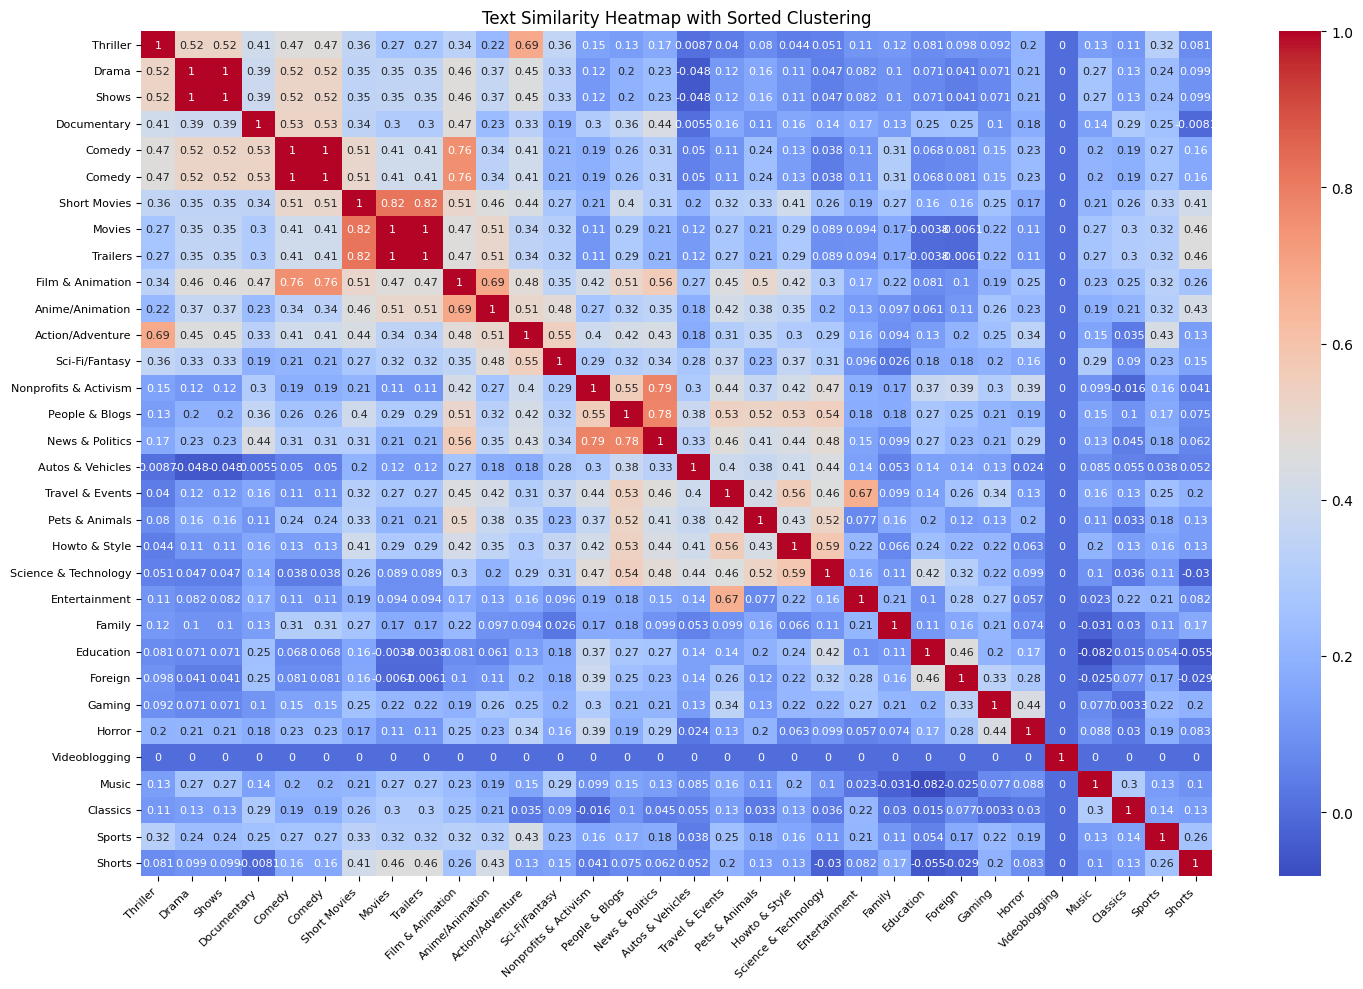

In [ ]:
# Sort columns and rows by linkage order
order = leaves_list(linked)
sorted_matrix = similarity_matrix[order][:, order]
sorted_texts = [cat[i] for i in order]

# Display heatmap with sorted order

plt.figure(figsize=(15, 10))  # Adjusted size for better fit in Jupyter Notebook
sns.heatmap(sorted_matrix, annot=True, cmap='coolwarm', xticklabels=sorted_texts, yticklabels=sorted_texts, cbar=True, annot_kws={"size": 8})
plt.title("Text Similarity Heatmap with Sorted Clustering")
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
# Cut dendrogram to form 10 or fewer clusters
clusters = fcluster(linked, t=10, criterion='maxclust')

In [ ]:
# Display cluster results
for i, cluster in enumerate(clusters):
    print(f"Text {i+1}: {cat[i]} -> Cluster {cluster}")

Text 1: Film & Animation -> Cluster 4
Text 2: Autos & Vehicles -> Cluster 6
Text 3: Music -> Cluster 9
Text 4: Pets & Animals -> Cluster 6
Text 5: Sports -> Cluster 9
Text 6: Short Movies -> Cluster 3
Text 7: Travel & Events -> Cluster 6
Text 8: Gaming -> Cluster 8
Text 9: Videoblogging -> Cluster 10
Text 10: People & Blogs -> Cluster 5
Text 11: Comedy -> Cluster 2
Text 12: Entertainment -> Cluster 7
Text 13: News & Politics -> Cluster 5
Text 14: Howto & Style -> Cluster 6
Text 15: Education -> Cluster 8
Text 16: Science & Technology -> Cluster 6
Text 17: Nonprofits & Activism -> Cluster 5
Text 18: Movies -> Cluster 3
Text 19: Anime/Animation -> Cluster 4
Text 20: Action/Adventure -> Cluster 4
Text 21: Classics -> Cluster 9
Text 22: Comedy -> Cluster 2
Text 23: Documentary -> Cluster 2
Text 24: Drama -> Cluster 1
Text 25: Family -> Cluster 7
Text 26: Foreign -> Cluster 8
Text 27: Horror -> Cluster 8
Text 28: Sci-Fi/Fantasy -> Cluster 4
Text 29: Thriller -> Cluster 1
Text 30: Shorts -> 

In [ ]:
clust_cat = pd.DataFrame({"Text": cat, "Cluster": clusters})
clust_cat = clust_cat.sort_values(by="Cluster").reset_index(drop=True)
print(clust_cat)

                     Text  Cluster
0                   Shows        1
1                Thriller        1
2                   Drama        1
3                  Comedy        2
4                  Comedy        2
5             Documentary        2
6                Trailers        3
7            Short Movies        3
8                  Movies        3
9         Anime/Animation        4
10       Film & Animation        4
11       Action/Adventure        4
12         Sci-Fi/Fantasy        4
13  Nonprofits & Activism        5
14        News & Politics        5
15         People & Blogs        5
16       Autos & Vehicles        6
17         Pets & Animals        6
18        Travel & Events        6
19   Science & Technology        6
20          Howto & Style        6
21          Entertainment        7
22                 Family        7
23                 Gaming        8
24                 Horror        8
25                Foreign        8
26              Education        8
27                  

In [ ]:
# Merge clust_cat and cat_df based on 'Text' (category name)
merged_cat_df = pd.merge(clust_cat, cat_df, left_on='Text', right_on='category', how='left')

merged_cat_df


,Text,Cluster,category_id,category
0,Shows,1,43,Shows
1,Thriller,1,41,Thriller
2,Drama,1,36,Drama
3,Comedy,2,23,Comedy
4,Comedy,2,34,Comedy
5,Comedy,2,23,Comedy
6,Comedy,2,34,Comedy
7,Documentary,2,35,Documentary
8,Trailers,3,44,Trailers
9,Short Movies,3,18,Short Movies


In [ ]:
viddf = pd.read_csv(path + "Datasets/comments/USvideos.csv",  encoding='utf-8', usecols=["video_id", "title", "category_id", "views", "likes", "dislikes", "comment_total", "channel_title", "tags"])

In [ ]:
viddf.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666


In [ ]:
viddf.describe(include="all")

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total
count,7998,7998,7998,7998.000000,7998,7.998000e+03,7.998000e+03,7998.000000,7998.000000
unique,2364,2398,1230,NaN,2204,NaN,NaN,NaN,NaN
top,Oo0NJsr5m4I,Tourist terrified by new glass walkway that cr...,Jimmy Kimmel Live,NaN,[none],NaN,NaN,NaN,NaN
freq,8,8,40,NaN,491,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,20.217679,NaN,9.391016e+05,3.450900e+04,1780.842711,4608.306952
std,NaN,NaN,NaN,7.415364,NaN,2.147691e+06,9.135465e+04,10818.085920,20245.638964
min,NaN,NaN,NaN,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,NaN,NaN,17.000000,NaN,9.690000e+04,1.901500e+03,68.000000,286.250000
50%,NaN,NaN,NaN,23.000000,NaN,3.086115e+05,8.649500e+03,273.000000,1086.500000
75%,NaN,NaN,NaN,25.000000,NaN,9.595132e+05,3.022050e+04,1013.000000,3464.250000


In [ ]:
viddf['category_id'] = viddf['category_id'].astype(int)
merged_cat_df['category_id'] = merged_cat_df['category_id'].astype(int)

# get clusters
viddf = pd.merge(viddf, merged_cat_df, on='category_id', how='left')

viddf.head()


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,Text,Cluster,category
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,Entertainment,7,Entertainment
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,Science & Technology,6,Science & Technology
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,People & Blogs,5,People & Blogs
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,Science & Technology,6,Science & Technology
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,Comedy,2,Comedy


In [ ]:
viddf.describe(include="all")

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,Text,Cluster,category
count,8753,8753,8753,8753.000000,8753,8.753000e+03,8.753000e+03,8753.000000,8753.000000,8753,8753.000000,8753
unique,2364,2398,1230,NaN,2204,NaN,NaN,NaN,NaN,16,NaN,16
top,odhMmAPDc54,Did You Call My Girl!? | Anwar Jibawi,jacksfilms,NaN,[none],NaN,NaN,NaN,NaN,Entertainment,NaN,Entertainment
freq,14,14,76,NaN,532,NaN,NaN,NaN,NaN,1601,NaN,1601
mean,NaN,NaN,NaN,20.457672,NaN,9.650622e+05,3.650537e+04,1790.937393,4740.375757,NaN,5.896150,NaN
std,NaN,NaN,NaN,7.131218,NaN,2.091289e+06,9.051940e+04,10388.451565,19546.187835,NaN,2.276896,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,17.000000,NaN,1.046450e+05,2.170000e+03,75.000000,317.000000,NaN,5.000000,NaN
50%,NaN,NaN,NaN,23.000000,NaN,3.366260e+05,9.484000e+03,308.000000,1177.000000,NaN,6.000000,NaN
75%,NaN,NaN,NaN,25.000000,NaN,1.050212e+06,3.448200e+04,1099.000000,3786.000000,NaN,7.000000,NaN


In [ ]:
viddf['Cluster'] = viddf['Cluster'].astype('category')



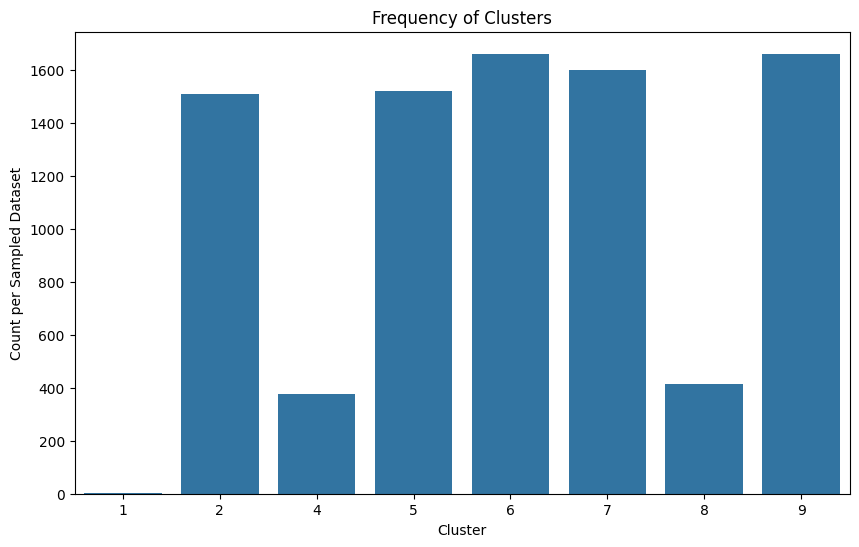

In [ ]:
# Plot frequency of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=viddf)
plt.title('Frequency of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count per Sampled Dataset')
plt.show()


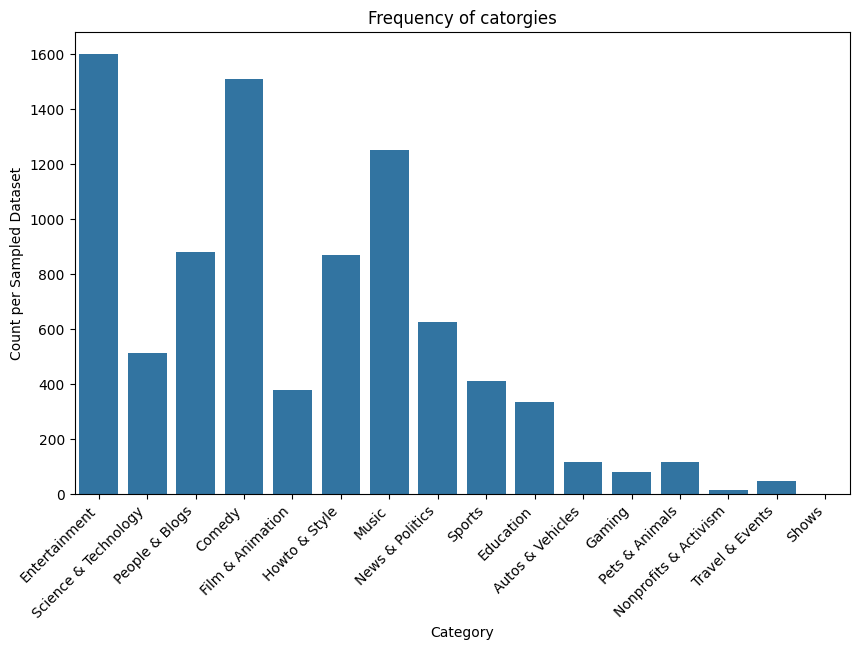

In [ ]:
# Plot frequency of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=viddf)
plt.title('Frequency of catorgies')
plt.xlabel('Category')
plt.ylabel('Count per Sampled Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
comments = pd.read_csv(path + "Datasets/comments/UScomments.csv",  encoding='utf-8', usecols=["video_id", "comment_text", "likes", "replies"])



<ipython-input-320-e71e0ddbacca>:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(path + "Datasets/comments/UScomments.csv",  encoding='utf-8', usecols=["video_id", "comment_text", "likes", "replies"])


In [ ]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
comments = comments.rename(columns={"likes": "comment_likes"})


In [ ]:
# Perform a left join between viddf and comments on 'video_id'
full_df = pd.merge(viddf, comments, on='video_id', how='left')

full_df.head()


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,Text,Cluster,category,comment_text,comment_likes,replies
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,Entertainment,7,Entertainment,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,Entertainment,7,Entertainment,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,Entertainment,7,Entertainment,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,Entertainment,7,Entertainment,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,Entertainment,7,Entertainment,trending 😉,3,0


In [ ]:
full_df['id'] = range(1, len(full_df) + 1)

# Save the DataFrame (replace 'output_file.csv' with your desired filename)
full_df.to_csv('full_yt_dataset.csv', index=False)


annotation assignment

In [ ]:
from sklearn.model_selection import train_test_split

stratified_sample, _ = train_test_split(full_df,
                                        train_size=1000,
                                        stratify=full_df['Cluster'],
                                        random_state=42)



In [ ]:
stratified_sample

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,Text,Cluster,category,comment_text,comment_likes,replies,id
772279,ebzims_XwpM,Lipstick That Changes the Way You Talk! (ft. M...,IISuperwomanII,23,iisuperwomanii|iisuperwomenii|superwoman|super...,1970035,145806,2194,13849,Comedy,2,Comedy,Vey nice. Short movie on farmer life must watc...,0,0,772280
3168304,M4cnP08e5kQ,Stranger Things' Gaten Matarazzo Recaps Season...,Teen Vogue,24,netflix|stranger things|stranger things actor|...,73266,4512,16,214,Entertainment,7,Entertainment,im sooo exited for season two!!!!,4,0,3168305
2523094,5ggZ9jIHnr8,Alesso & Anitta - Is That For Me (Official Video),Alesso,10,alesso anitta is that for me official music vi...,3982024,306843,36948,42046,Music,9,Music,Um amor pela Anitta ❤,0,1,2523095
580769,-zCYX0esYlo,Everything You Need to Know About The Last Dab...,First We Feast,26,First we feast|fwf|firstwefeast|food|food porn...,413743,13772,130,1534,Howto & Style,6,Howto & Style,"How about you call Pepper X, THE EVANSSLAYER",0,0,580770
2331073,roiPLImXMoc,TRUE FRIENDSHIP | Chris & Jack,Chris and Jack,23,chris & jack|chris and jack|true friendship|ch...,55852,2855,29,210,Comedy,2,Comedy,The month does not pass fast enough! I want m...,0,0,2331074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939881,7k8PFMQQIxI,Dragon Age Inquisition - The Dawn Will Come - ...,Peter Hollens,10,Dragon Age Inquisition the dawn will come|the ...,54978,6692,38,1433,Music,9,Music,Goosebumps,0,0,1939882
309996,1u5jO57eD-U,The IT Department,The Late Late Show with James Corden,24,James Corden|The Late Late Show|Colbert|late n...,2856877,62776,1268,1500,Entertainment,7,Entertainment,Ok now I see that we need a sitcom where penny...,0,0,309997
1770377,_r5eTelhpmQ,Darius Rucker - Life's Too Short (Audio),DariusRuckerVEVO,10,Darius|Rucker|Life's|Too|Short|Capitol|Records...,51914,1880,49,102,Music,9,Music,OMG! This album is going to be awesome!!,0,0,1770378
1232474,Y5wOTID9JmY,New Dad Andy Samberg’s Epic CONAN Entrance - ...,Team Coco,23,[none],34032,1599,47,170,Comedy,2,Comedy,Yrs later andy in jail 4 abusing daughter.,0,0,1232475


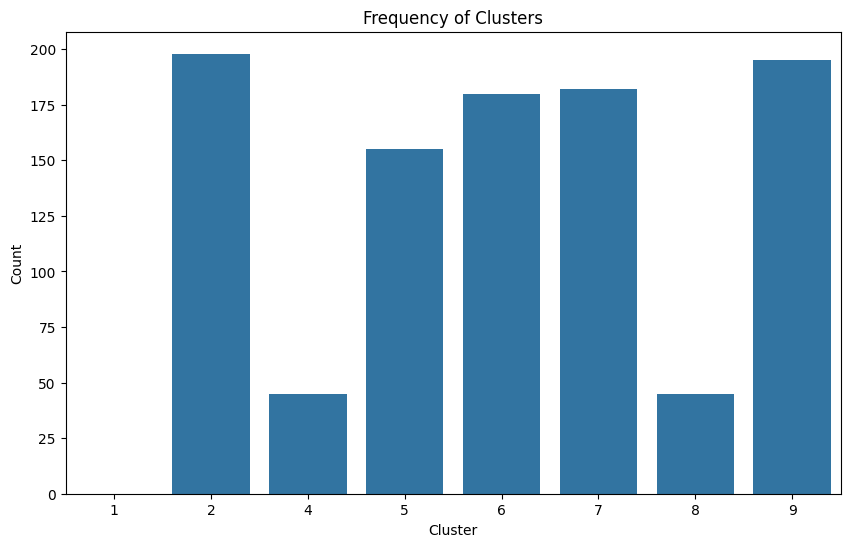

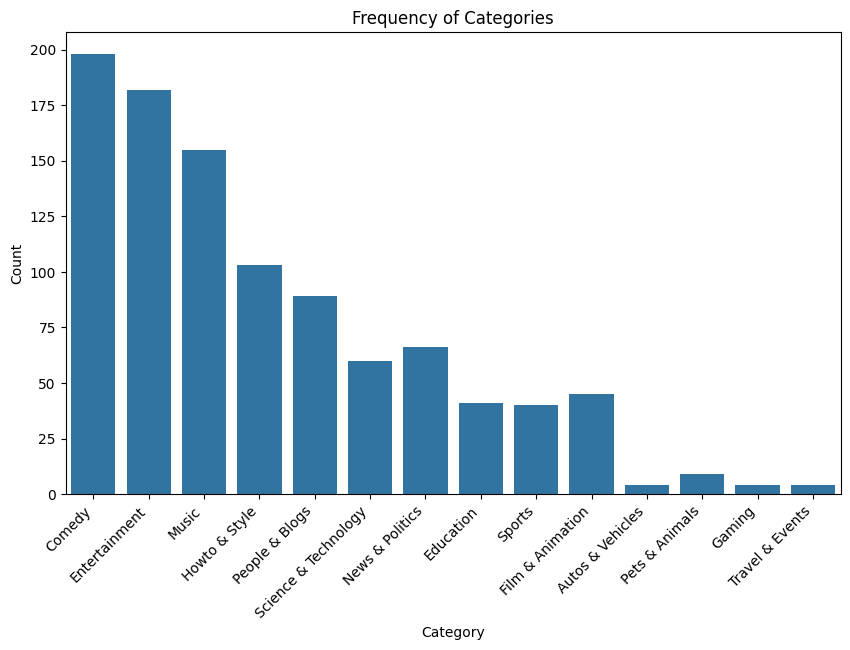

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=stratified_sample)
plt.title('Frequency of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Plot frequency of categories
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=stratified_sample)
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
row_indices = list(stratified_sample.index)


random.seed(42)
random.shuffle(row_indices)

In [ ]:
# Calculate the number of annotations per annotator
num_ann1 = 125
num_ann2 = 125
num_ann3 = 250
num_ann4 = 250
num_ann5 = 250


annotator_assignments = {
    "Sashank": num_ann1,
    "Omar": num_ann2,
    "Duayna": num_ann3,
    "Yiheng": num_ann4,
    "Megg": num_ann5,
}


In [ ]:
# Assign annotations to annotators without repetition
ann2_indices = row_indices[:num_ann1+num_ann2 + 62]


ann3_indices = row_indices[num_ann1+num_ann2 - 62: num_ann1 + num_ann2 + num_ann3]


ann4_indices = row_indices[num_ann1 + num_ann2 + num_ann3: num_ann1 + num_ann2 + num_ann3 + num_ann4 + 62]


ann5_indices = row_indices[num_ann1 + num_ann2 + num_ann3 + num_ann4 - 62:]


In [ ]:
ann1_indices = ann2_indices[:156]
ann2_indices = ann2_indices[156:]

In [ ]:
stratified_sample['label'] = np.nan

In [ ]:
ann1 = stratified_sample.loc[ann1_indices, ['id', 'title', 'channel_title', 'category', 'tags',  'comment_text', 'label']]
ann2 = stratified_sample.loc[ann2_indices, ['id', 'title', 'channel_title', 'category', 'tags',  'comment_text', 'label']]
ann3 = stratified_sample.loc[ann3_indices, ['id', 'title', 'channel_title', 'category', 'tags',  'comment_text', 'label']]
ann4 = stratified_sample.loc[ann4_indices, ['id', 'title', 'channel_title', 'category', 'tags',  'comment_text', 'label']]
ann5 = stratified_sample.loc[ann5_indices, ['id', 'title', 'channel_title', 'category', 'tags',  'comment_text', 'label']]

In [ ]:
ann1.head()

,id,title,channel_title,category,tags,comment_text,label
2319386,2319387,POKÉMON POWER | Songify This,schmoyoho,Music,pokemon|pokémon|remix|pastor|autotune|schmoyoh...,Jim bakker plz,NaN
628079,628080,Funny you should ask...,Google,Science & Technology,google|google phone|google hardware|october 4t...,What is the song???,NaN
453245,453246,Weezer - Beach Boys,weezer,Music,weezer|pacific daydream|pacificdaydream|beach ...,"Guys, it isn't bad! \n\n\n\n\nBut it's not goo...",NaN
1120161,1120162,The Maine - How Do You Feel?,TheMaineOfficialVEVO,Music,music|music video|vydia|How Do You Feel?|The M...,Love this so much. Y'all are incredible,NaN
2448588,2448589,Taylor Twellman says there's an 'arrogance' to...,ESPN,Sports,us soccer|usmnt|usmnt world cup|us soccer worl...,"just to clarify, mens football is the nr1 Spor...",NaN


In [ ]:
print("Shape of ann1:", ann1.shape)
print("Shape of ann2:", ann2.shape)
print("Shape of ann3:", ann3.shape)
print("Shape of ann4:", ann4.shape)
print("Shape of ann5:", ann5.shape)

Shape of ann1: (156, 7)
Shape of ann2: (156, 7)
Shape of ann3: (312, 7)
Shape of ann4: (312, 7)
Shape of ann5: (312, 7)


In [ ]:
ann1.to_csv(path+'annotations/ann1_Sashank.csv', index=False)
ann2.to_csv(path+'annotations//ann2_Omar.csv', index=False)
ann3.to_csv(path+'annotations/ann3_Duayna.csv', index=False)
ann4.to_csv(path+'annotations/ann4_Yiheng.csv', index=False)
ann5.to_csv(path+'annotations/ann5_Megg.csv', index=False)
